In [1]:
import pyBigWig
import numpy as np

In [2]:
track_file = "/Users/pochtalionizm/Projects/neuro/data/hg38.phastCons20way.bw"

In [3]:
bw = pyBigWig.open(track_file)

In [4]:
bw.chroms()
bw.chroms("chr2")

242193529

In [5]:
part = bw.values("chr2", 6000000, 6002000, numpy = True)
len(part)

2000

In [6]:
path = "data/2019-02-23_16:18:26_2.5-2.5_NC_000002.12_Homo"
seq_np = np.load(path + "/seq_np.npy")
mask = np.load(path + "/mask.npy")
out_np = np.load(path + "/00050_out_np.npy")
info = open(path + "/info.txt")
print(info.readlines())
info.close()

['2019-02-23_16:18:26\n', 'skip_depth6,reflection,net,adam,noise,32,0.01,0.03,51,False,646788\n', '0002000_006000000_2.5-2.5_193_NC_000002.12_Homo\n']


In [15]:
def compare(seq_np, out_np):
    if len(seq_np) != len(out_np):
        print("error")
        return None
    
    length = len(seq_np[0])

    out_array = np.zeros((4,length)) #array analog to seq_np
    for i in range(length):
        n = np.argmax(out_np[:, i])
        out_array[n, i] = 1
            
    diff = np.zeros(length)
    for i in range(length):
        a = out_array[:, i]
        b = seq_np[:, i]
        diff[i] = np.linalg.norm(a-b)
    return diff

In [16]:
diff = compare(seq_np, out_np)
sum(diff)

564.2712113868682

In [19]:
part[0:10]

array([0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.001, 0.003,
       0.013], dtype=float32)

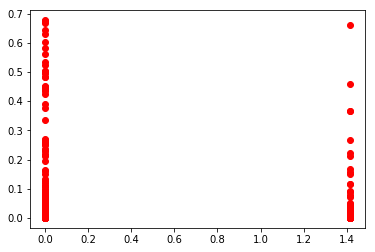

In [18]:
import matplotlib.pyplot as plt
plt.plot(diff, part, "ro")
plt.show()